# **Fitting $f_{\rm NL}^{(3)}$**

### Loading packages:

In [4]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi'] = 196

### Loading $T_\mathcal{RS}$ from file:

In [6]:
NTRS, TRS = [], []
with open("TRS.txt", "r") as f:
    for line in f.readlines():
        Ni, TRSi = line.replace("{", "").replace("}", "").split(", ")
        NTRS.append(float(Ni))
        TRS.append(float(TRSi))

TRS_interp = interp1d(NTRS, TRS, kind="cubic")  # Interpolating the points to get TRS as function of N

### Plot of $T_\mathcal{RS}$ versus $N$

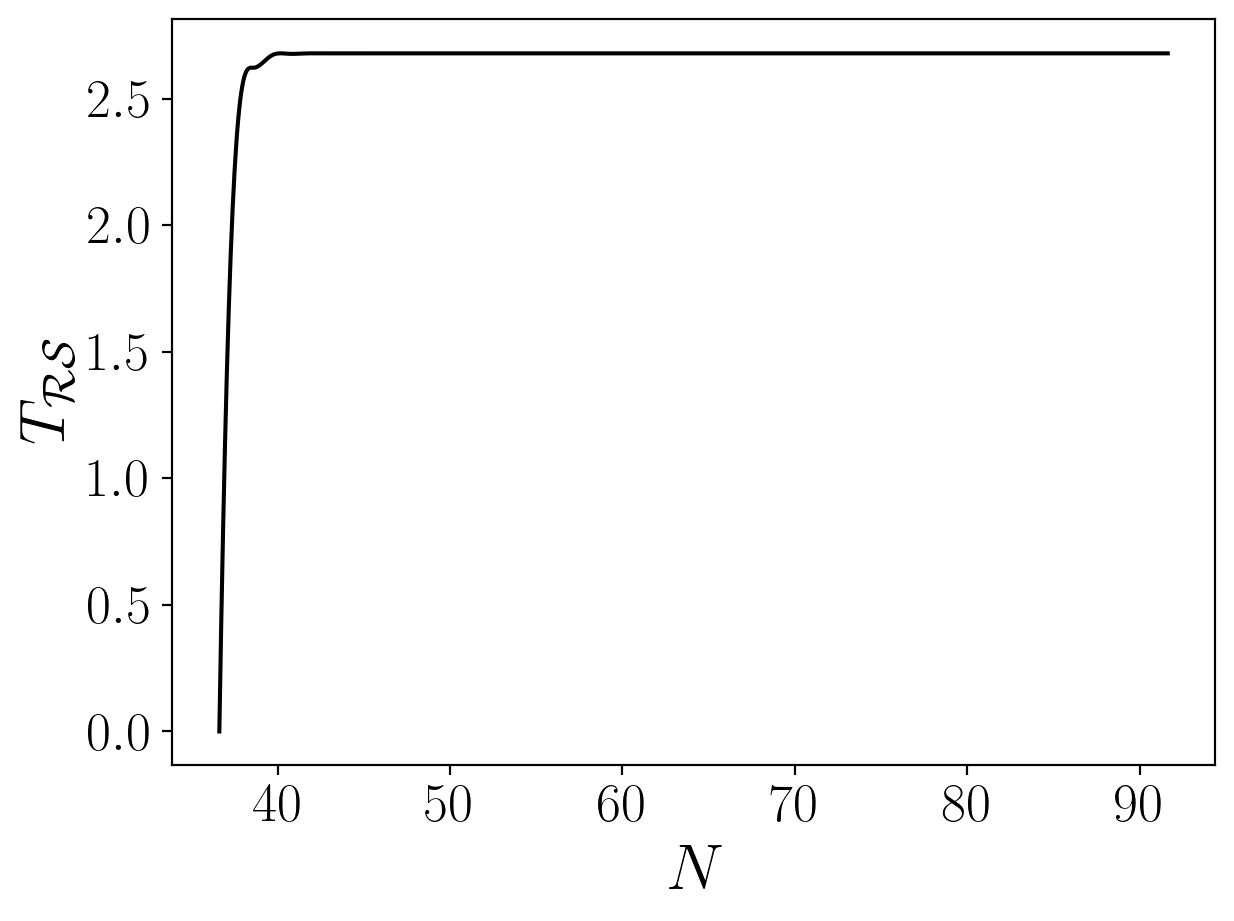

In [7]:
num_points = 1_000  # How many points to use in plot
N_interp = np.linspace(NTRS[0], NTRS[-1], num_points)

plt.plot(N_interp, TRS_interp(N_interp), c='k')
plt.xlabel("$N$", fontsize=24)
plt.ylabel("$T_\mathcal{RS}$", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

### Functions describing $f_{\rm NL}^{(3)}$ and $f_{\rm NL}^{(4)}$ for the parameter choices:

epsilonHor = 0.006899632517005119

etaPar = -0.0005005194952640984, etaPerp = 0.27600315415647897

TRS = 2.67888

beta*=0.996252

alpha*=0.106341

I1 = 0.0928961, I2 = 0.0302858, I3 = 0.5338, I4 = 0.670429, I5 = 0.218572, I6 = 0.174028

GradPerpTRS = 16.095985108872895, GradParTRS = 0.04693042589840897

MPerpPerp = -0.006229490874973494

MPerpPar = 2.3130659811479224

In [9]:
fNL3 = lambda TRS, C1, C2, C3, C4: 0.106341**(-2)*(C1 + 3*C2*TRS + 3*C3*TRS**2 + C4*TRS**3) \
                    / (9.40371 + 6.11011 *TRS + TRS**2)**2

fNL4 = lambda TRS: (-126.892 + 72.6042*TRS + 87.3785*TRS**2 + 16.3731*TRS**3) \
                    / (9.40371 + 6.11011 *TRS + TRS**2)**2

### Loading numerical $f_{\rm NL}$ from file

In [10]:
Ns_PyT, fNL_PyT = np.load("output/3pt/fNL.npy")
fNL = interp1d(Ns_PyT, fNL_PyT, kind="cubic")

### Plots comparing $f_{\rm NL}$ to $f_{\rm NL}^{(4)}$

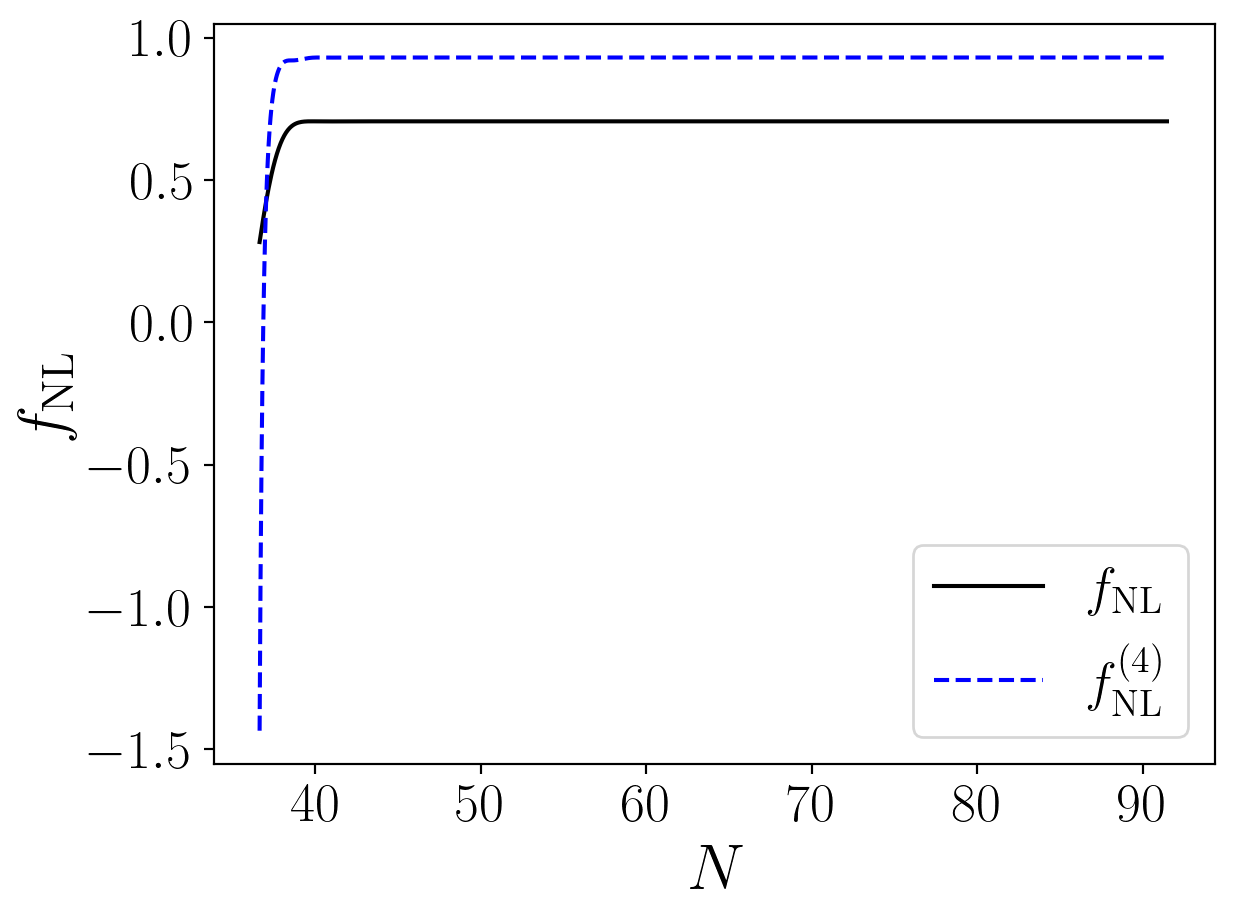

In [12]:
plt.plot(N_interp[:-3], -fNL(N_interp[:-3]), c='k', label="$f_{\\rm NL}$")
plt.plot(N_interp, fNL4(TRS_interp(N_interp)), c='b', label="$f_{\\rm NL}^{(4)}$", ls='--')
plt.xlabel("$N$", fontsize=24)
plt.ylabel("$f_{\\rm NL}$", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("output/3pt/fNLfNL4")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


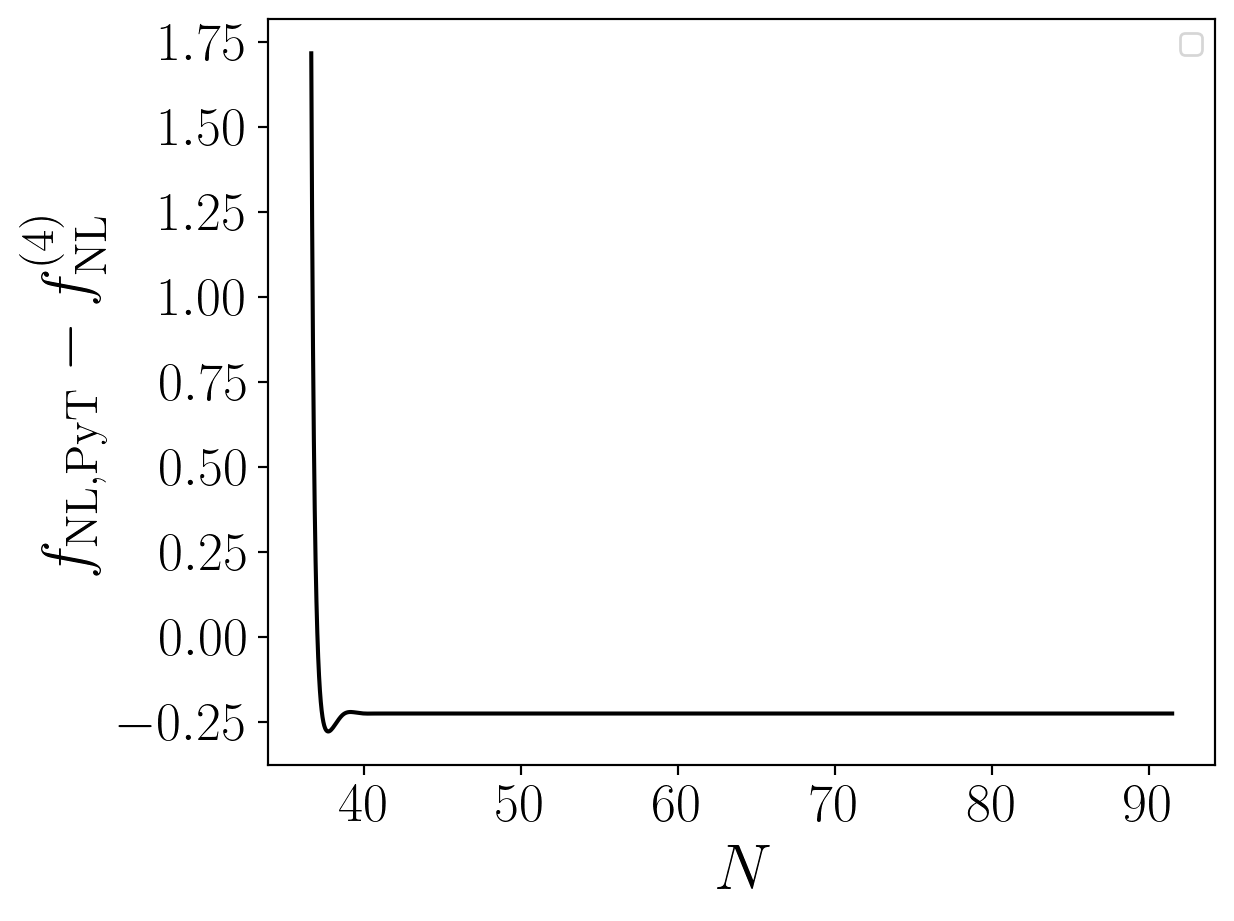

In [13]:
fNL_diff = lambda N: -fNL(N) - fNL4(TRS_interp(N))

plt.plot(N_interp[:-3], fNL_diff(N_interp[:-3]), c='k')
plt.xlabel("$N$", fontsize=24)
plt.ylabel("$f_{\\rm NL, PyT} - f_{\\rm NL}^{(4)}$", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.tight_layout()

### Fitting the difference to $f_{\rm NL}^{(3)}$

In [14]:
from scipy.optimize import curve_fit
from functools import partial

In [15]:
params, _ = curve_fit(fNL3, TRS_interp(N_interp[:-3]), fNL_diff(N_interp[:-3]))

### Plotting the results of the fit

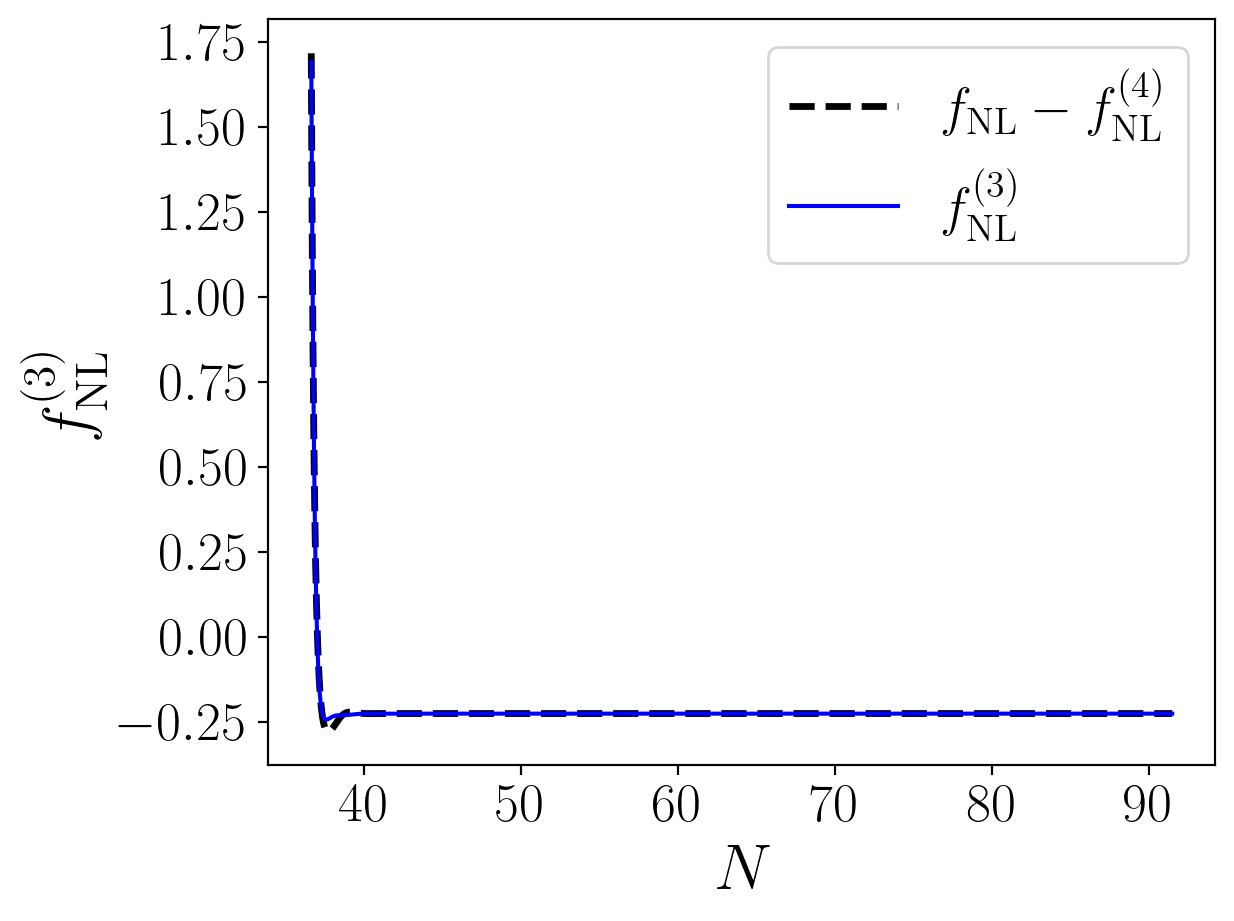

In [16]:
fNL3_params = partial(fNL3, C1=params[0], C2=params[1], C3=params[2], C4=params[3])

plt.plot(N_interp[:-3], fNL_diff(N_interp[:-3]), c='k', label="$f_{\\rm NL} - f_{\\rm NL}^{(4)}$", linestyle='--', lw=2.5)
plt.plot(N_interp[:-3], fNL3_params(TRS_interp(N_interp[:-3])), c='b', label="$f_{\\rm NL}^{(3)}$", lw=1.5)
plt.xlabel("$N$", fontsize=24)
plt.ylabel("$f_{\\rm NL}^{(3)}$", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("output/3pt/fNL3")

### Best-fit values for the paramters:

In [17]:
params

array([ 1.69045863,  0.05181454, -0.54866494,  0.36141559])